# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: [Chocolate Bar Ratings | Kaggle](https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings?resource=download)

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [88]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#create dataframe
choco_df = pd.read_csv("chocolate.csv")

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [89]:
choco_df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [90]:
choco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [91]:
#looking at the columns I notice the names are hard to read, something to consider changing during data cleaning
choco_df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [92]:
#looking to see how many null values we have, it looks like this may be incorrect based on the first 5 rows
choco_df.isna().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [93]:
choco_df.count()

Company \n(Maker-if known)           1795
Specific Bean Origin\nor Bar Name    1795
REF                                  1795
Review\nDate                         1795
Cocoa\nPercent                       1795
Company\nLocation                    1795
Rating                               1795
Bean\nType                           1794
Broad Bean\nOrigin                   1794
dtype: int64

In [94]:
#I was confused initially why the REF (what I assumed to be a reference #) would have so few unique values, I went back to look at the data set and it turns out it's a value linked to when it was entered into the database, the higher the more recent
#I'm surprised to see that there isn't a column for the experts rating, it would be nice to sift for bias that way but I wonder if there isn't a lot of repeat experts
choco_df.nunique()

Company \n(Maker-if known)            416
Specific Bean Origin\nor Bar Name    1039
REF                                   440
Review\nDate                           12
Cocoa\nPercent                         45
Company\nLocation                      60
Rating                                 13
Bean\nType                             41
Broad Bean\nOrigin                    100
dtype: int64

In [95]:
#no duplicated entries
choco_df.duplicated().sum()

0

In [96]:
#looking to see if there's a pattern in terms of rating
choco_df['Rating'].value_counts().sort_index()

1.00      4
1.50     10
1.75      3
2.00     32
2.25     14
2.50    127
2.75    259
3.00    341
3.25    303
3.50    392
3.75    210
4.00     98
5.00      2
Name: Rating, dtype: int64

In [97]:
#looking to see if there's industry standards in cocoa percent
choco_df['Cocoa\nPercent'].value_counts().sort_index()

100%       20
42%         1
46%         1
50%         1
53%         1
55%        16
56%         2
57%         1
58%         8
60%        43
60.50%      1
61%         8
62%        14
63%        12
64%        34
65%        78
66%        23
67%        27
68%        47
69%        10
70%       672
71%        31
72%       189
72.50%      4
73%        40
73.50%      2
74%        50
75%       222
76%        23
77%        33
78%        17
79%         1
80%        72
81%         5
82%        17
83%         4
84%         4
85%        36
86%         1
87%         1
88%         8
89%         2
90%         8
91%         3
99%         2
Name: Cocoa\nPercent, dtype: int64

In [98]:
#looking to see what variety in terms of location these bars have
choco_df['Company\nLocation'].value_counts()

U.S.A.               764
France               156
Canada               125
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Japan                 17
Brazil                17
Peru                  17
Madagascar            17
New Zealand           17
Denmark               15
Vietnam               11
Scotland              10
Guatemala             10
Israel                 9
Costa Rica             9
Argentina              9
Poland                 8
Lithuania              6
Honduras               6
South Korea            5
Nicaragua              5
Sweden                 5
Domincan Republic      5
Ireland                4
Netherlands            4
Fiji                   4
Sao Tome               4
Puerto Rico            4
Mexico                 4


In [99]:
#looking to see who are the major bean providers
choco_df['Broad Bean\nOrigin'].value_counts()

Venezuela                214
Ecuador                  193
Peru                     165
Madagascar               145
Dominican Republic       141
                        ... 
Peru, Belize               1
Peru, Mad., Dom. Rep.      1
PNG, Vanuatu, Mad          1
Trinidad, Ecuador          1
Venezuela, Carribean       1
Name: Broad Bean\nOrigin, Length: 100, dtype: int64

In [100]:
#confirming that there are null values in this column, may not be useful since so many are missing
choco_df['Bean\nType'].value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
Matina                        3
EET                           3
Beniano                       3
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Criollo, Forastero            2
Amazon, ICS                   2
Criollo (Amarru)              2
Amazon mix                    2
Nacional                      2
Criollo (Ocumare)             1
Criollo (Ocumare 67)          1
Trinitario, TCGA              1
Trinitario (Amelonado)        1
Trinitario, Nacional          1
Forastero (Amelonado)         1
Foraster

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<AxesSubplot:>

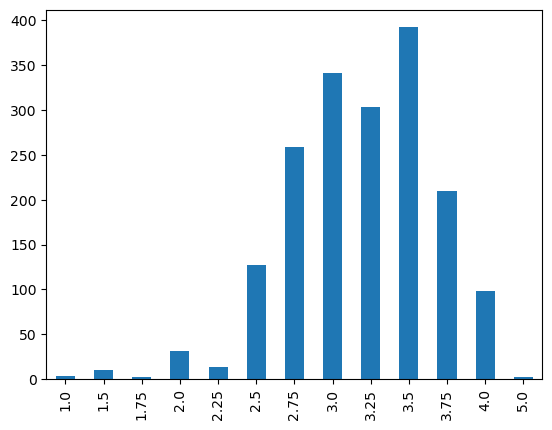

In [101]:
#I called value count on this already but it's helpful to see that most of these bars are rated on the higher end
choco_df['Rating'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

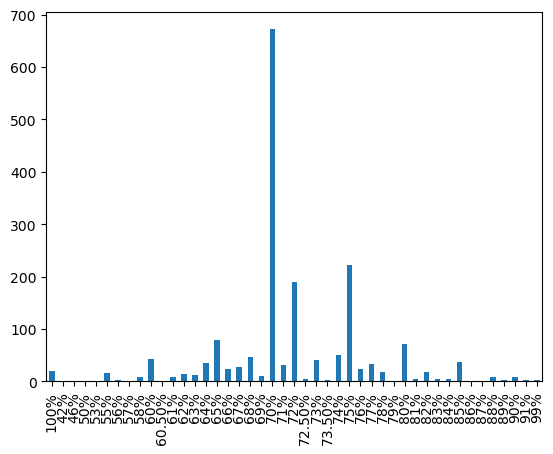

In [102]:
#I already did value counts here as well, but it's helpful to see just how many of these bars are 70%
#it may be a good idea to group by similar percentage since they're so varied
#unsure why the 100% is over on the left, good to remember that for future analysis
choco_df['Cocoa\nPercent'].value_counts().sort_index().plot(kind='bar')

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 

There were quite a few null values for Bean Type which should be interesting. I'm wondering if they're correlated with a certain bean origin or location. I'm also surprised to see that there isn't a column for experts. It must be the case that they are all different or there's little overlap.

2. Do you have any concerns about your dataset? 

I'm concerned about the null values, I don't know that Bean Type will be useful. I'm also a little concerned about the column names. This might be something to fix as they're not intuitive when I'm working with them but they're also not very easy to read.

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

I'll consider the null values, the column titles, and maybe consider getting rid of the REF data as I'm not sure it's useful.